<a href="https://colab.research.google.com/github/tuankhoin/COMP30027-Practical-Solutions/blob/main/COMP90049/Week%2011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Shameless PR

Want to see some Computer Vision in action?

At 11am-4:30pm Wednesday 18/10 (Next week!), I will be demonstrating my Capstone project that is done in partnership with CSIRO's Data61: ***Evaluation and Calibration of a Markerless Motion Capture***.
- Location: South Lawn, Booth 118

> What's the catch?
- What is currently done: <img src="https://github.com/tuankhoin/COMP90086-Practical-Solutions/blob/master/vicon.gif?raw=true" width=300/>
  - Dedicated space, $4 million system!
  - You have to strip
  - They are taped to your body ▶ Free waxing at the end
- What we do:
<img src="https://media.licdn.com/dms/image/D562CAQEEze-57QuLZw/comment-image-shrink_8192_480/0/1675746861098?e=1697342400&v=beta&t=k82Wt3HMcIWaGNYSvnJaaHxtd4KJonBFtfbFc1Sv41w" width=300/>
  - Deep learning + Computer Vision ▶ It's cool
  - Only need to use crappy webcams and some GPU

What do I see there?
- You get to hear me talking
- You get to play a game!

<img src="https://i.imgur.com/JjQDVLb.gif" />

###### The University of Melbourne, School of Computing and Information Systems
# COMP90049 Intro to Machine Learning

## Week 11 - Ensemble & Anomaly Detection

---

## Theoretical Questions

## 1. Let’s revisit the logic behind the voting method of classifier combination (used in Bagging, Random Forests, and Boosting to some extent). We are assuming that the errors between the all classifiers are uncorrelated

#### (i) Build the confusion matrices for these classifiers, based on the assumptions above.

#### (ii) Using that the majority voting, what the expected error rate of the voting ensemble?

### a. First, let’s assume our three independent classifiers all have the error rate of e = 0.4, calculated over 1000 instances with binary labels (500 A / 500 B).
How to treat the problem:
- Get C1's prediction distribution
- C1's prediction becomes ground truth for C2 -> Get C2's distribution
- Same for C3

| **Actual** | **C1** |  **C2**  |  **C3**  | **Vote** |
|:--------------:|:----------:|:------------:|:------------:|:---------------:|
|        A=500   |      A=300 |       A=180  |       A=108  |            A    |
|                |            |              |       B=72   |            A    |
|                |            |       B=120  |       A=72   |            A    |
|                |            |              |       B=48   |            B (wrong)   |
|                |      B=200 |       A=120  |       A=72   |            A    |
|                |            |              |       B=48   |            B (wrong)   |
|                |            |       B=80   |       A=48   |            B (wrong)   |
|                |            |              |       B=32   |            B (wrong)   |
|        B=500   |      A=200 |       A=80   |         A=32 |            A (wrong)   |
|                |            |              |         B=48 |            A (wrong)   |
|                |            |        B=120 |         A=48 |            A (wrong)   |
|                |            |              |         B=72 |            B    |
|                |      B=300 |        A=120 |         A=48 |            A (wrong)   |
|                |            |              |         B=72 |            B    |
|                |            |        B=180 |         A=72 |            B    |
|                |            |              |        B=108 |            B    |

By the way, Markdown f***ing sucks with its table representation!

Anyway, the error is:
$$E = \frac{48 + 48 + 48 + 32 + 32 + 48 + 48 + 48}{1000} = 35.2\%$$

Error is better than all 3.

This relies on the assumption of errors being uncorrelated:
- if the errors were perfectly correlated, we would see no improvement
- if the errors were mostly correlated, we would see only a little improvement

### b. Now repeat the steps, consider three classifiers, first with e1 = 0.1, the second and third with e2=e3=0.2

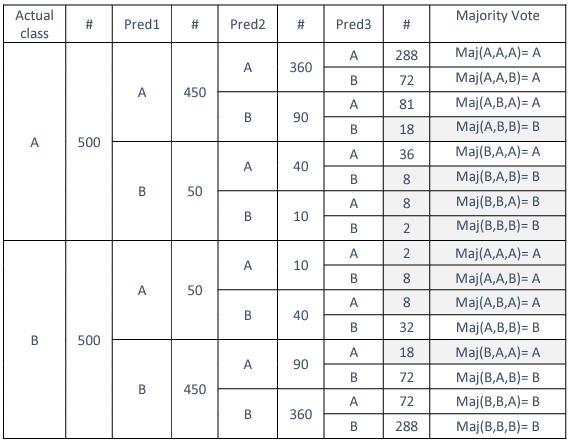

$$E = \frac{18 + 8 + 8 + 2 + 2 + 8 + 8 + 18}{1000} = 72$$

<img src="https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fbucketeer-e05bbc84-baa3-437e-9518-adb32be77984.s3.amazonaws.com%2Fpublic%2Fimages%2F05d988ab-bf1a-4b58-95ee-68307b2c42fb_1600x1060.jpeg" height=400/>

## 2. Given the following univariate dataset, calculate a statistical model based on the assumption that your data is coming from a normal distribution. Determine whether the instance x=1.2 is anomalous or not if we use the boxplot test?
$$X = \{2, 2.5, 2.6, 3, 3.1, 3.2, 3.4, 3.7, 4, 4.1, 4.8\}$$

Step 1: Get the normal distribution
- $\mu = \frac{1}{11}\sum x = 3.31$
- $\sigma = \sqrt{\frac{1}{11}\sum (x-\mu)^2} = 0.77$

Step 2: Check if it's in the inlier range. 2 ways to do this

1. Get the z-score: $$z = \frac{|x-\mu|}{\sigma} = \frac{|1.2-3.31|}{0.77} = 2.74 < 3$$ ▶ Not an outlier
2. Check the inlier range $\mu \pm 3\sigma$: $$3.31 \pm 3\times 0.77 = [1⟶ 5.62]$$ $1<1.5<5.62$ ▶ Not an outlier

## 3. Given the following univariate dataset, determine the outlier score for instances (x=0.5) and (x=4) using the specified strategy

$X = \{1,1.05, 1.1, 1.15, 1.2, 1.21, 1.3, 1.4, 1.45, 1.5, 4.55, 5.6, 6.8, 7.58, 8.6, 9.7, 10.3, 11.4, 12.3,13.5\} $

### a. Inverse Relative density using 2-NN (Manhattan distance)
Formula, with $x_i \in \underbrace{NN_k(x)}_\text{K nearest neighbor}$:
- $density(x,k) = \frac{k}{\sum distance(x,x_i)}$
- $RD(x,k) = k\frac{density(x,k)}{\sum density(x_i,k)}$

#### With x=0.5 (NN: 1, 1.5)
- $density(x=0.5,2) = \frac{2}{|0.5-1| + |0.5-1.05|} = 1.9$

With NN(1) = (1.05, 1) and NN(1.05) = (1, 1.05):
- $density(x=1,2) = 13.3$
- $density(x=1.05,2) = 20$

Then: $RD(0.5,2) = \frac{1.9 \times 2}{13.3+20} = 0.11 ⟶ RD^{-1} = 9 \;(high)$

#### With x=4 (NN: 4.55, 5.6):
$RD(0.5,2) = \frac{0.93 \times 2}{0.61+0.89} = 1.24 ⟶ RD^{-1} = 0.81 \;(low)$

#### Observation
- 0.5 and 4 have equal distance to the nearest neighbor
- 0.5 has worse association, as the distance is from denser cluster (remember, it's called 'relative')

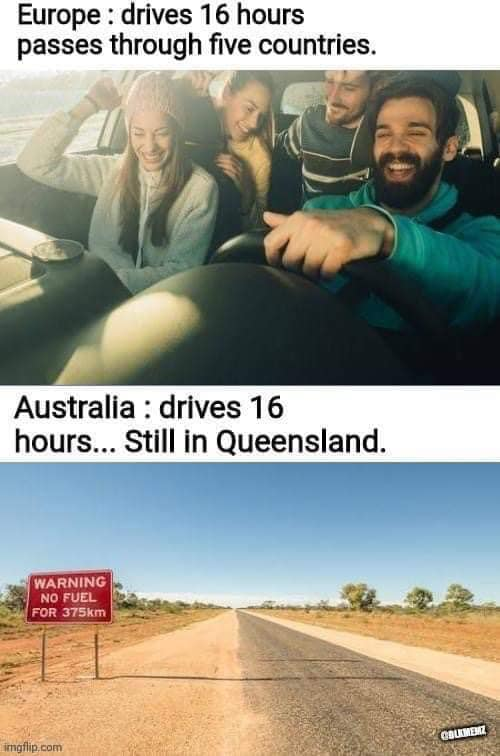

### b. Manhattan distance to 2nd nearest neighbor
- x=0.5: 0.55
- x=4: 1.6

This metric does not capture variability (density) of cluster, so this time x=4 is the worse one.

## 4. We have a dataset ‘zoo’ with 101 instances. Each instance corresponds to an animal and is characterized by 16 features. These animals are categorized into 7 groups (mammal, bird, reptile, fish, amphibian, insect, invertebrate). Suggest a suitable method to detect anomalies between them. Would you use a supervised, semi-supervised or unsupervised approach? Can you think of a way to make anomaly detection more reliable?

> This is a type of design question - Usually the final question of the exam
- Which you will usually skip because you ran out of time lmao

What can be an anomaly?
- Platypus (milk like a mammal, venomous like amphibians, lay eggs, etc.)
- Dolphin (fish-mammal)

Anomaly detection method
- Supervised: not feasible as no label available to detect anomalies
- Semi-supervised: Can look for instances with high entropy/confidence
  - False positive may happen, as this also happens for abnormal animals (e.g. albino)
  - Can try ensemble to make decisions more certain
- Unsupervised: try some clustering and voting for different parameters
  - Can work to detect some rules
  - Again, can do ensemble to get more inputs